# LAB : 07 ~ Reading Fits Images 

In [126]:
from astropy.io import fits

# Open a FITS file
hdulist = fits.open('C:\\Users\\hp\\DIP\\AST.fits')

# Access the data in the primary HDU (Header Data Unit)
data = hdulist[0].data
hdulist.close()  # Close the FITS file

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


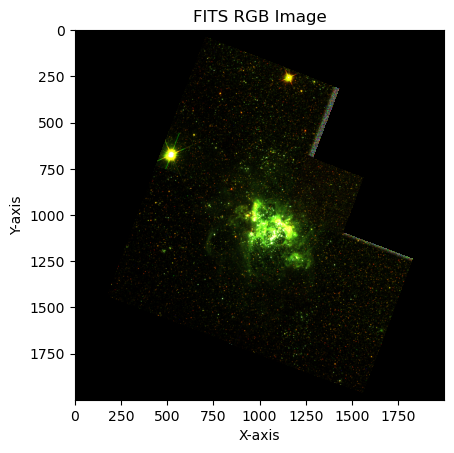

SIMPLE  =                    T / file does conform to FITS standard             BITPIX  =                  -32 / number of bits per data pixel                  NAXIS   =                    3 / number of data axes                            NAXIS1  =                 2000 / length of data axis 1                          NAXIS2  =                 2000 / length of data axis 2                          NAXIS3  =                    3 / length of data axis 3                          EXTEND  =                    T / FITS dataset may contain extensions            COMMENT   FITS (Flexible Image Transport System) format is defined in 'AstronomyCOMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H DATE    = '2023-11-23T18:51:09' / file creation date (YYYY-MM-DDThh:mm:ss UT)   CRVAL1  =    23.63840425194444 / right ascension of reference pixel (deg)       CRVAL2  =    30.78177846972222 / declination of reference pixel (deg)           CRPIX1  =                1000. / Referen

In [128]:
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np

# Open a FITS file
hdulist = fits.open('C:\\Users\\hp\\DIP\\AST.fits')

# Access the data in the primary HDU (Header Data Unit)
data = hdulist[0].data
header = hdulist[0].header

# Close the FITS file
hdulist.close()



# Display the FITS image as an RGB image
plt.imshow(data.transpose(1, 2, 0))  # Assuming the last dimension represents RGB
plt.title('FITS RGB Image')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

# Print the header information
print(header)
#picture courtesy: https://archive.stsci.edu/

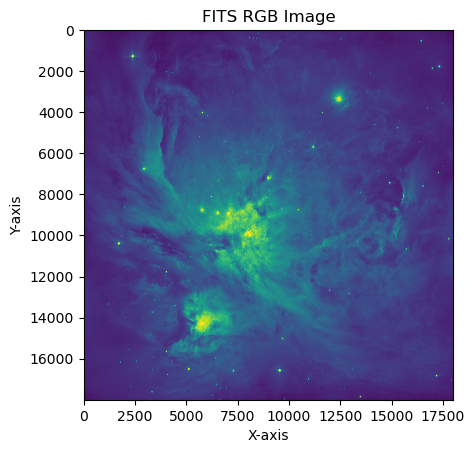

SIMPLE  =                    T / Written by IDL:  Mon Jun 13 17:11:16 2011      BITPIX  =                    8 / Number of bits per data pixel                  NAXIS   =                    2 / Number of data axes                            NAXIS1  =                18000 /                                                NAXIS2  =                18000 /                                                DATE    = '2011-06-13'         / Creation UTC (CCCC-MM-DD) date of FITS header  COMMENT FITS (Flexible Image Transport System) format is defined in 'Astronomy  COMMENT and Astrophysics', volume 376, page 359; bibcode 2001A&A...376..359H    CTYPE1  = 'RA---TAN'           / Coordinate Type                                CTYPE2  = 'DEC--TAN'           / Coordinate Type                                EQUINOX =              2000.00 /Equinox of Ref. Coord.                          CD1_1   =  -2.77489264908E-005 / Degrees / Pixel                                CD2_1   =   3.68953809920E-008 / Degrees

In [129]:
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np

# Open a FITS file
hdulist = fits.open('C:\\Users\\hp\\DIP\\hlsp_orion_hst_acs_colorimage_b_v1_drz_sci.fits')

# Access the data in the primary HDU (Header Data Unit)
data = hdulist[0].data
header = hdulist[0].header

# Close the FITS file
hdulist.close()



# Display the FITS image as an RGB image
plt.imshow(data)
plt.title('FITS RGB Image')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

# Print the header information
print(header)
#picture courtesy: https://archive.stsci.edu/

# Applying Equalizer

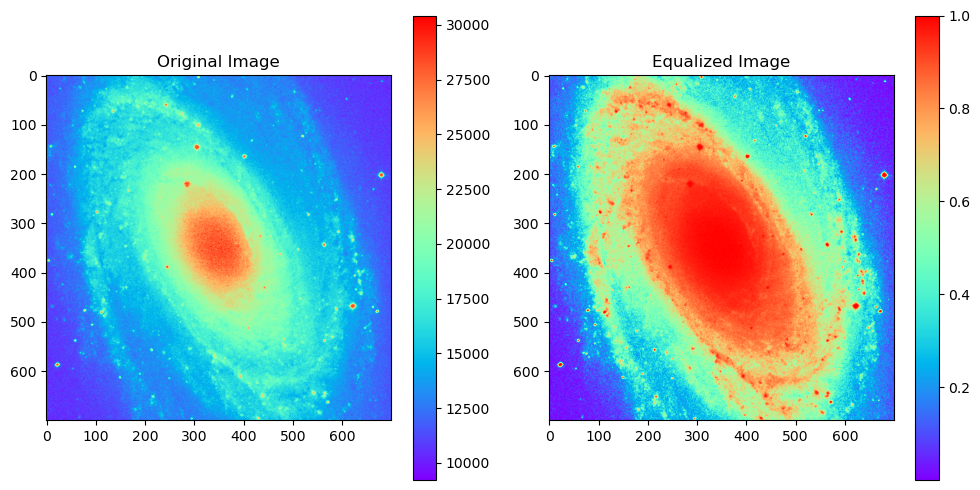

In [51]:
from astropy.io import fits
import matplotlib.pyplot as plt
from skimage import exposure

# Open a FITS file
hdulist = fits.open('C:\\Users\\hp\\DIP\\NGC3031_DSS2_Blue.fits')

# Access the data in the primary HDU (Header Data Unit)
data = hdulist[0].data
header = hdulist[0].header

# Close the FITS file
hdulist.close()

# Perform histogram equalization to enhance image contrast
data_equalized = exposure.equalize_hist(data)

# Display the equalized image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(data, cmap='rainbow')
plt.title('Original Image')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(data_equalized, cmap='rainbow')
plt.title('Equalized Image')
plt.colorbar()

plt.tight_layout()
plt.show()

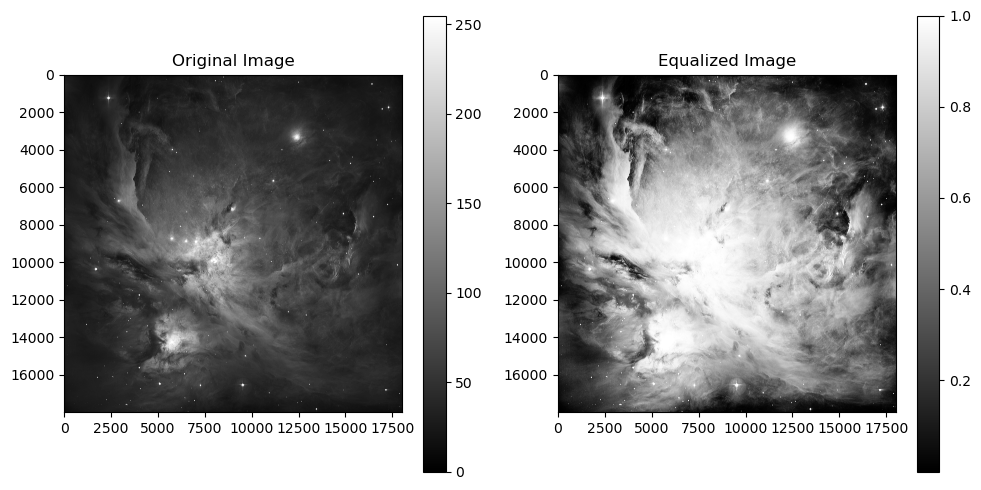

In [117]:
import matplotlib.pyplot as plt
from astropy.io import fits
from skimage import exposure
import numpy as np

# Open a FITS file
hdulist = fits.open('C:\\Users\\hp\\DIP\\hlsp_orion_hst_acs_colorimage_b_v1_drz_sci.fits')

# Access the data in the primary HDU (Header Data Unit)
data = hdulist[0].data
header = hdulist[0].header

# Close the FITS file
hdulist.close()

# Check for invalid or non-finite values in the image data and replace them
data[np.isnan(data)] = 0  # Replace NaN values with 0 (or any other suitable value)
data[np.isinf(data)] = 0  # Replace infinite values with 0 (or any other suitable value)

# Perform histogram equalization to enhance image contrast
data_equalized = exposure.equalize_hist(data)

# Display the equalized image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(data, cmap='gray')
plt.title('Original Image')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(data_equalized, cmap='gray')
plt.title('Equalized Image')
plt.colorbar()

plt.tight_layout()
plt.show()


# Composite

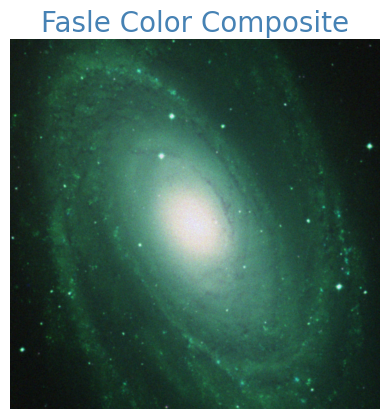

In [14]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

# Open and load the FITS images for red, green, and blue channels
hdulist_red = fits.open('C:\\Users\\hp\\DIP\\NGC3031_DSS2_Nir.fits')
hdulist_green = fits.open('C:\\Users\\hp\\DIP\\NGC3031_DSS2_Blue.fits')
hdulist_blue = fits.open('C:\\Users\\hp\\DIP\\NGC3031_DSS2_Red.fits')

# Load the data from the primary HDU for each channel
data_red = hdulist_red[0].data
data_green = hdulist_green[0].data
data_blue = hdulist_blue[0].data

# Close the FITS files
hdulist_red.close()
hdulist_green.close()
hdulist_blue.close()

# Normalize each channel's data to the [0, 1] range
data_red_normalized = (data_red - data_red.min()) / (data_red.max() - data_red.min())
data_green_normalized = (data_green - data_green.min()) / (data_green.max() - data_green.min())
data_blue_normalized = (data_blue - data_blue.min()) / (data_blue.max() - data_blue.min())

# Stack the channels to create the RGB composite
rgb_image = np.dstack((data_red_normalized, data_green_normalized, data_blue_normalized))

# Display the RGB composite
plt.imshow(rgb_image)
plt.title('Fasle Color Composite', fontsize = 20 , color='steelblue')
plt.axis('off')
plt.show()

# Histogram

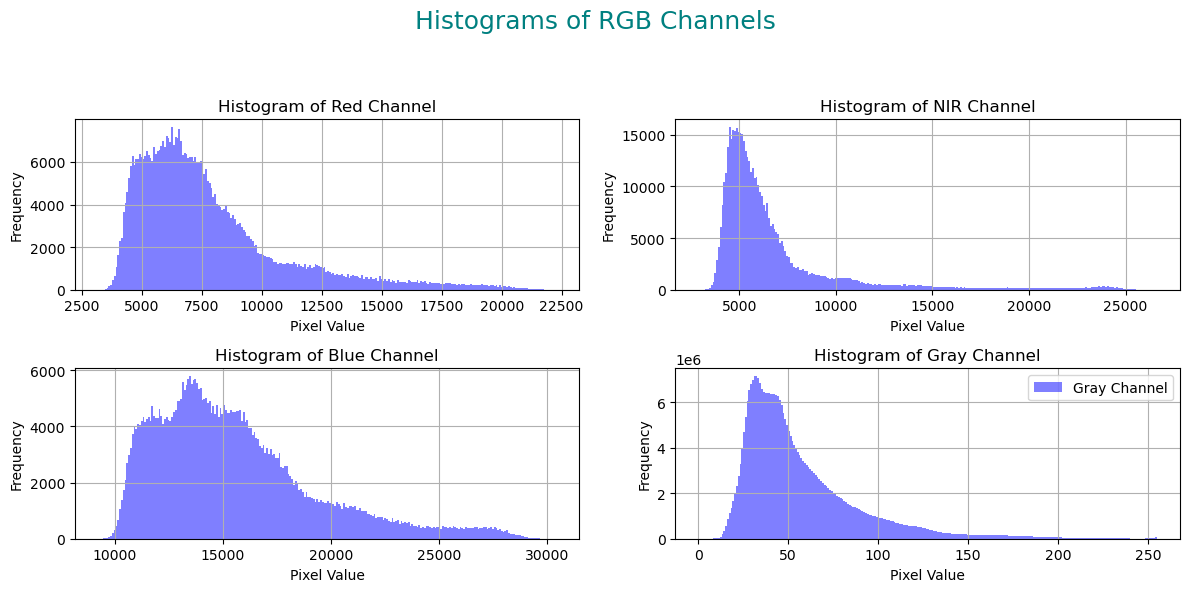

In [116]:
from astropy.io import fits
import matplotlib.pyplot as plt

# Function to create and display histograms
def plot_histogram(data, label, title):
    plt.hist(data.ravel(), bins=256, color='blue', alpha=0.5, label=label)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.title(title)  # Add a title to the histogram
    plt.grid(True)

# Open and load the FITS images for red, green, and blue channels
hdulist_red = fits.open('C:\\Users\\hp\\DIP\\NGC3031_DSS2_Red.fits')
hdulist_nir = fits.open('C:\\Users\\hp\\DIP\\NGC3031_DSS2_NIR.fits')
hdulist_blue = fits.open('C:\\Users\\hp\\DIP\\NGC3031_DSS2_Blue.fits')
hdulist_gray = fits.open('C:\\Users\\hp\\DIP\\hlsp_orion_hst_acs_colorimage_b_v1_drz_sci.fits')

# Load the data from the primary HDU for each channel
data_red = hdulist_red[0].data
data_nir = hdulist_nir[0].data
data_blue = hdulist_blue[0].data
data_gray = hdulist_gray[0].data

# Create histograms for each channel
plt.figure(figsize=(12, 6))
plt.subplot(221)
plot_histogram(data_red, 'Red Channel', 'Histogram of Red Channel')
plt.subplot(222)
plot_histogram(data_nir,  'NIR Channel', 'Histogram of NIR Channel')
plt.subplot(223)
plot_histogram(data_blue, 'Blue Channel', 'Histogram of Blue Channel')
plt.subplot(224)
plot_histogram(data_gray, 'Gray Channel', 'Histogram of Gray Channel')

plt.suptitle('Histograms of RGB Channels', fontsize=18 , color= 'teal')
plt.legend()
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()


# Statistical Data

In [82]:
import numpy as np
from astropy.io import fits

# Function to compute and display statistics
def compute_statistics(data, channel_name):
    mean_value = np.mean(data)
    median_value = np.median(data)
    
    # Remove negative values and convert the data to integers by rounding to the nearest integer
    mode_data = np.round(data).astype(int)
    mode_data = mode_data[mode_data >= 0]  # Remove negative values
    
    if mode_data.size > 0:
        mode_value = float(np.argmax(np.bincount(mode_data.ravel())))
    else:
        mode_value = None
    
    std_deviation = np.std(data)  # Calculate standard deviation
    
    print(f"Statistics for {channel_name} Channel:")
    print(f"Mean: {mean_value:.2f}")
    print(f"Median: {median_value:.2f}")
    print(f"Mode: {mode_value}\n")
    print(f"Standard Deviation: {std_deviation:.2f}\n")

# Open and load the FITS images for red, green, and blue channels
hdulist_red = fits.open('C:\\Users\\hp\\DIP\\NGC3031_DSS2_Red.fits')
hdulist_green = fits.open('C:\\Users\\hp\\DIP\\NGC3031_DSS2_NIR.fits')
hdulist_blue = fits.open('C:\\Users\\hp\\DIP\\NGC3031_DSS2_Blue.fits')

# Load the data from the primary HDU for each channel
data_red = hdulist_red[0].data
data_nir = hdulist_green[0].data
data_blue = hdulist_blue[0].data

# Close the FITS files
hdulist_red.close()
hdulist_green.close()
hdulist_blue.close()

# Compute and display statistics for each channel
compute_statistics(data_red, 'Red')
compute_statistics(data_nir, 'NIR')
compute_statistics(data_blue, 'Blue')

Statistics for Red Channel:
Mean: 7820.16
Median: 6983.00
Mode: 6024.0

Standard Deviation: 3159.48

Statistics for NIR Channel:
Mean: 6785.70
Median: 5648.00
Mode: 5292.0

Standard Deviation: 3551.89

Statistics for Blue Channel:
Mean: 15581.98
Median: 14817.00
Mode: 11705.0

Standard Deviation: 3778.28



In [95]:
import numpy as np
from astropy.io import fits

# Function to compute and display statistics
def compute_statistics(data, channel_name):
    mean_value = np.mean(data)
    median_value = np.median(data)
    
    # Remove negative values and convert the data to integers by rounding to the nearest integer
    mode_data = np.round(data).astype(int)
    mode_data = mode_data[mode_data >= 10]  # Remove negative values
    
    if mode_data.size > 0:
        mode_value = float(np.argmax(np.bincount(mode_data.ravel())))
    else:
        mode_value = None
    
    std_deviation = np.std(data)  # Calculate standard deviation
    
    print(f"Statistics for {channel_name} Channel:")
    print(f"Mean: {mean_value:.2f}")
    print(f"Median: {median_value:.2f}")
    print(f"Mode: {mode_value}\n")
    print(f"Standard Deviation: {std_deviation:.2f}\n")

# Open and load the FITS images for red, green, and blue channels
hdulist_1 = fits.open('C:\\Users\\hp\\DIP\\hlsp_m82_hst_acs-wfc_all_f435w_v1_drz.fits')
hdulist_2 = fits.open('C:\\Users\\hp\\DIP\\AST.fits')
hdulist_3 = fits.open('C:\\Users\\hp\\DIP\\hlsp_orion_hst_acs_colorimage_b_v1_drz_sci.fits')


# Load the data from the primary HDU for each channel
data_1 = hdulist_1[0].data
data_2 = hdulist_2[0].data
data_3 = hdulist_2[0].data


# Close the FITS files
hdulist_1.close()
hdulist_2.close()
hdulist_3.close()


# Compute and display statistics for each channel
compute_statistics(data_1, 'FITS IMAGE')
compute_statistics(data_2, 'FITS IMAGE')
compute_statistics(data_3, 'FITS IMAGE')

Statistics for FITS IMAGE Channel:
Mean: 0.04
Median: 0.02
Mode: 10.0

Standard Deviation: 0.62

Statistics for FITS IMAGE Channel:
Mean: nan
Median: nan
Mode: 10.0

Standard Deviation: nan

Statistics for FITS IMAGE Channel:
Mean: nan
Median: nan
Mode: 10.0

Standard Deviation: nan

